# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC,SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

# Read Data

In [2]:
df = pd.read_excel("E:\Sem 3\INFO 7610 NLP\Assignment3\spam.xlsx")
df.head()

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

# Checking for the missing value

In [4]:
df.isnull().sum()

Type       0
Message    0
dtype: int64

# Differentiate in X and Y

In [5]:
X = df['Message']
y = df['Type'] 

# Label Encoding to convert Text data to numerical form

In [6]:
label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)

# Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3900,), (1672,), (3900,), (1672,))

In [9]:
X_train = X_train.apply(str)
X_test = X_test.apply(str)

# Apply TF-IDF for Feature Extraction

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Naive Byes Classification

In [11]:
nbc = MultinomialNB()# Calculate accuracy and F1-score for NBC
nbc.fit(X_train_tfidf, y_train)
y_pred_nbc = nbc.predict(X_test_tfidf)

In [12]:
# Calculate accuracy and F1-score for NBC
accuracy_nbc = accuracy_score(y_test, y_pred_nbc)
f1_nbc = f1_score(y_test, y_pred_nbc)

In [13]:
print("NBC Accuracy:",accuracy_nbc)
print("NBC F1 Score:",f1_nbc)

NBC Accuracy: 0.9599282296650717
NBC F1 Score: 0.8194070080862533


In [14]:
# ROC curve for Naive Bayes
fpr_nbc, tpr_nbc, _ = roc_curve(y_test, y_pred_nbc)
roc_auc_nbc = auc(fpr_nbc, tpr_nbc)

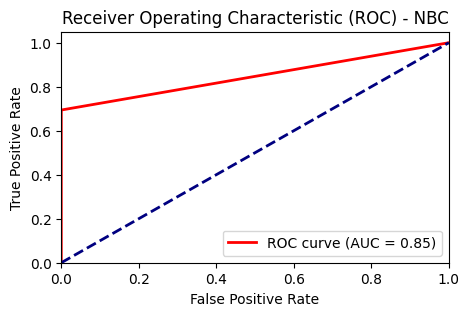

In [53]:
# Plot ROC curve for SVM
plt.figure(figsize=(5, 3))
plt.plot(fpr_nbc, tpr_nbc, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc_nbc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - NBC')
plt.legend(loc='lower right')
plt.show()

# Linear SVC

In [16]:
linear_svc = LinearSVC()
linear_svc.fit(X_train_tfidf, y_train)
y_pred_linear_svc = linear_svc.decision_function(X_test_tfidf)

In [17]:
y_pred_linear_svc_binary = (y_pred_linear_svc > 0).astype(int)

# Calculate accuracy and F1-score for Linear SVC
accuracy_linear_svc = accuracy_score(y_test, y_pred_linear_svc_binary)
f1_linear_svc = f1_score(y_test, y_pred_linear_svc_binary)

In [18]:
print("Linear SVC Accuracy:", accuracy_linear_svc)
print("Linear SVC F1 Score:", f1_linear_svc)

Linear SVC Accuracy: 0.9832535885167464
Linear SVC F1 Score: 0.9326923076923077


In [19]:
# ROC curve for Linear SVC
fpr_linear_svc, tpr_linear_svc, _ = roc_curve(y_test, y_pred_linear_svc)
roc_auc_svc = auc(fpr_linear_svc, tpr_linear_svc)

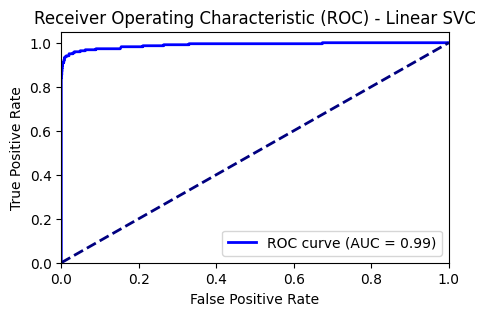

In [54]:
# Plot ROC curve for SVM
plt.figure(figsize=(5, 3))
plt.plot(fpr_linear_svc, tpr_linear_svc, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_svc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Linear SVC')
plt.legend(loc='lower right')
plt.show()

# SVM Classifier

In [21]:
svm = svm.SVC()
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)

In [22]:
# Calculate accuracy and F1-score for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

In [23]:
print("SVM Accuracy:", accuracy_svm)
print("SVM F1 Score:", f1_svm)

SVM Accuracy: 0.9796650717703349
SVM F1 Score: 0.9158415841584158


In [24]:
# Compute ROC curve and ROC area for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

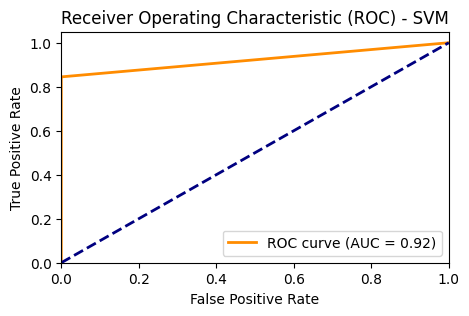

In [55]:
# Plot ROC curve for SVM
plt.figure(figsize=(5, 3))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - SVM')
plt.legend(loc='lower right')
plt.show()

# Random Forest

In [26]:
rf_classifier= RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)
y_pred_rf = rf_classifier.predict(X_test_tfidf)

In [27]:
# Calculate accuracy and F1-score for SVM
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

In [28]:
print("SVM Accuracy:", accuracy_rf)
print("SVM F1 Score:", f1_rf)

SVM Accuracy: 0.9766746411483254
SVM F1 Score: 0.9022556390977443


In [29]:
# Compute ROC curve and ROC area for SVM
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

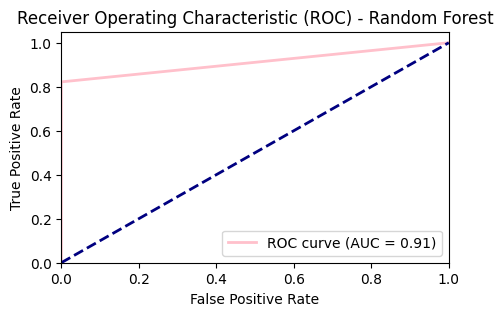

In [56]:
# Plot ROC curve for SVM
plt.figure(figsize=(5, 3))
plt.plot(fpr_rf, tpr_rf, color='pink', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc='lower right')
plt.show()

# LSA 

In [31]:
from sklearn.decomposition import TruncatedSVD 

n_components = 20  # You can adjust the number of components as needed
lsa = TruncatedSVD(n_components=n_components)
X_train_lsa = lsa.fit_transform(X_train_tfidf)
X_test_lsa = lsa.transform(X_test_tfidf)

In [32]:
X_train_lsa_negative = X_train_lsa - X_train_lsa.min() + 1

# LSA NBC

In [33]:
nbc = MultinomialNB()# Calculate accuracy and F1-score for NBC
nbc.fit(X_train_lsa_negative, y_train)
y_pred_lsa_nbc = nbc.predict(X_test_lsa)

In [34]:
# Calculate accuracy and F1-score for NBC
accuracy_lsa_nbc = accuracy_score(y_test, y_pred_lsa_nbc)
f1_lsa_nbc = f1_score(y_test, y_pred_lsa_nbc)

In [35]:
print("NBC LSA Accuracy:",accuracy_lsa_nbc)
print("NBC LSA F1 Score:",f1_lsa_nbc)

NBC LSA Accuracy: 0.8690191387559809
NBC LSA F1 Score: 0.0


In [36]:
# ROC curve for Naive Bayes
fpr_lsa_nbc, tpr_lsa_nbc, _ = roc_curve(y_test, y_pred_lsa_nbc)
roc_auc_lsa_nbc = auc(fpr_lsa_nbc, tpr_lsa_nbc)

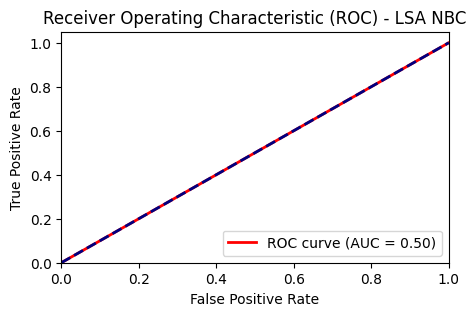

In [57]:
# Plot ROC curve for SVM
plt.figure(figsize=(5, 3))
plt.plot(fpr_lsa_nbc, tpr_lsa_nbc, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc_lsa_nbc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - LSA NBC')
plt.legend(loc='lower right')
plt.show()

# Linear SVC

In [38]:
linear_svc = LinearSVC()
linear_svc.fit(X_train_lsa, y_train)
y_pred_lsa_linear_svc = linear_svc.decision_function(X_test_lsa)

In [39]:
y_pred_lsa_linear_svc_binary = (y_pred_lsa_linear_svc > 0).astype(int)

# Calculate accuracy and F1-score for Linear SVC
accuracy_lsa_linear_svc = accuracy_score(y_test, y_pred_lsa_linear_svc_binary)
f1_lsa_linear_svc = f1_score(y_test, y_pred_lsa_linear_svc_binary)

In [40]:
print("Linear SVC Accuracy:", accuracy_lsa_linear_svc)
print("Linear SVC F1 Score:", f1_lsa_linear_svc)

Linear SVC Accuracy: 0.9575358851674641
Linear SVC F1 Score: 0.8220551378446115


In [41]:
# ROC curve for Linear SVC
fpr_lsa_linear_svc, tpr_lsa_linear_svc, _ = roc_curve(y_test, y_pred_lsa_linear_svc)
roc_auc_lsa_linear_svc = auc(fpr_lsa_linear_svc, tpr_lsa_linear_svc)

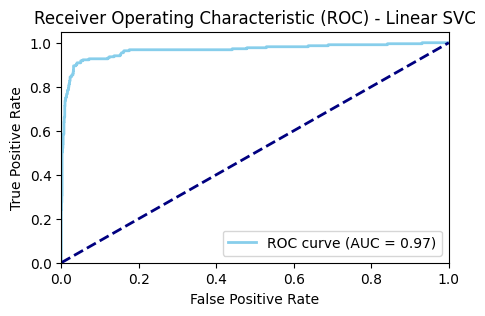

In [58]:
# Plot ROC curve for SVM
plt.figure(figsize=(5, 3))
plt.plot(fpr_lsa_linear_svc, tpr_lsa_linear_svc, color='skyblue', lw=2, label=f'ROC curve (AUC = {roc_auc_lsa_linear_svc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Linear SVC')
plt.legend(loc='lower right')
plt.show()

# LSA SVM

In [43]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train_lsa, y_train)
y_pred_lsa_svm = svc_model.predict(X_test_lsa)

In [44]:
# Calculate accuracy and F1-score for SVM
accuracy_lsa_svm = accuracy_score(y_test, y_pred_lsa_svm)
f1_lsa_svm = f1_score(y_test, y_pred_lsa_svm)

In [45]:
print("Linear SVM Accuracy:", accuracy_lsa_svm)
print("Linear SVM F1 Score:", f1_lsa_svm)

Linear SVM Accuracy: 0.9706937799043063
Linear SVM F1 Score: 0.8801955990220048


In [46]:
# Compute ROC curve and ROC area for SVM
fpr_lsa_svm, tpr_lsa_svm, _ = roc_curve(y_test, y_pred_lsa_svm)
roc_auc_lsa_svm = auc(fpr_lsa_svm, tpr_lsa_svm)

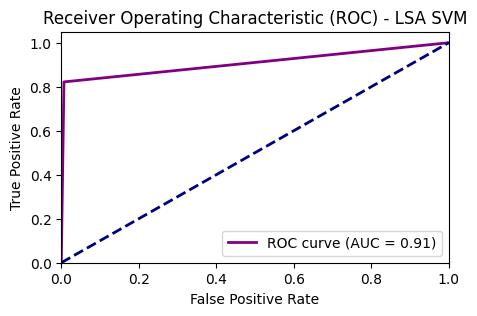

In [59]:
# Plot ROC curve for SVM
plt.figure(figsize=(5, 3))
plt.plot(fpr_lsa_svm, tpr_lsa_svm, color='purple', lw=2, label=f'ROC curve (AUC = {roc_auc_lsa_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - LSA SVM')
plt.legend(loc='lower right')
plt.show()

# LSA Random Forest

In [48]:
rf_classifier= RandomForestClassifier()
rf_classifier.fit(X_train_lsa, y_train)
y_pred_rf_lsa = rf_classifier.predict(X_test_lsa)

In [49]:
# Calculate accuracy and F1-score for SVM
accuracy_rf_lsa = accuracy_score(y_test, y_pred_rf_lsa)
f1_rf_lsa = f1_score(y_test, y_pred_rf_lsa)

In [50]:
print("LSA Random Forest Accuracy:", accuracy_rf_lsa)
print("LSA Random Forest Score:", f1_rf_lsa)

LSA Random Forest Accuracy: 0.9688995215311005
LSA Random Forest Score: 0.8693467336683417


In [51]:
# Compute ROC curve and ROC area for SVM
fpr_rf_lsa, tpr_rf_lsa, _ = roc_curve(y_test, y_pred_rf_lsa)
roc_auc_rf_lsa = auc(fpr_rf_lsa, tpr_rf_lsa)

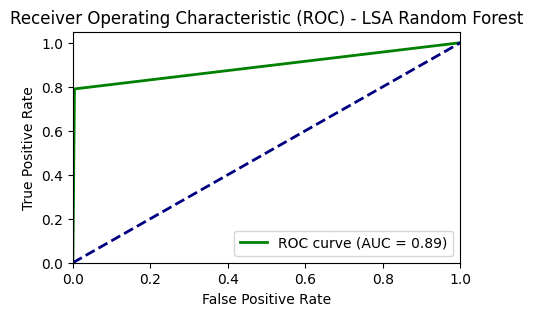

In [60]:
# Plot ROC curve for SVM
plt.figure(figsize=(5, 3))
plt.plot(fpr_rf_lsa, tpr_rf_lsa, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc_rf_lsa:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - LSA Random Forest')
plt.legend(loc='lower right')
plt.show()